In [66]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import sklearn as skl
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.decomposition import PCA

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
iris = load_iris()
# iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [28]:
url = '/content/drive/MyDrive/DADOS/iris_csv.csv'

In [29]:
dados_iris = pd.read_csv(url, sep=',')
dados_iris.head(10)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [30]:
dados_iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
dados_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
dados_iris.value_counts('class')

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [33]:
# CRIANDO UMA INTANCIA DO CLASSIFICADOR SVM
svmClassifier = LinearSVC(random_state= 111)

In [34]:
# EXECUTANDO OS DADOS DE TREINAMENTO

# 90% treino
# 10% teste

X_train, X_test, Y_train, Y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size= 0.10,
                                                    random_state= 111)

In [35]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(135, 4)
(135,)
(15, 4)
(15,)


In [36]:
# TREINANDO O MODELO COM DADOS DE TREINAMENTO
svmClassifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(random_state=111)

In [37]:
# EXECUTANDO DADOS DE TESTE
predicted = svmClassifier.predict(X_test)
predicted

array([0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2])

In [38]:
# COMPARANDO OS DADOS DE TESTE
print(predicted)
print(Y_test)
print(predicted == Y_test)

[0 0 2 2 1 0 0 2 2 1 2 0 1 2 2]
[0 0 2 2 1 0 0 2 2 1 2 0 2 2 2]
[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True]


In [39]:
# OBTENDO A PRESIÇÃO DO MODELO
metrics.accuracy_score(Y_test, predicted)

0.9333333333333333

In [40]:
# OBTENDO O 'ERRO ABSOLUTO MEDIO' DO MODELO
metrics.mean_absolute_error(Y_test, predicted)

0.06666666666666667

In [41]:
# MATRIZ DE CONFUSÃO (CONFUSION MATRIX)
metrics.confusion_matrix(Y_test, predicted)

array([[5, 0, 0],
       [0, 2, 0],
       [0, 1, 7]])

# Criando um modelo de aprendizado supervisionado com regressão logística

In [46]:
logClassifier = linear_model.LogisticRegression(C= 150, random_state= 111)

In [47]:
# EXECUTANDO OS DADOS DE TREINAMENTO
X_train, X_test, Y_train, Y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size= 0.10,
                                                    random_state= 111)

logClassifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=150, random_state=111)

In [48]:
# EXECUTANDO OS DADOS DE TESTE
predicted = logClassifier.predict(X_test)
predicted

array([0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2])

In [49]:
# AVALIANDO O MODELO
metrics.accuracy_score(Y_test, predicted)

1.0

In [50]:
# ANALISANDO A MATRIZ DE CONFUSÃO
metrics.confusion_matrix(Y_test, predicted)

array([[5, 0, 0],
       [0, 2, 0],
       [0, 0, 8]])

In [54]:
# VISUALIZANDO O CLASSIFICADOR
pca = PCA(n_components= 2).fit(X_train)
pca_2d = pca.transform(X_train)

#pca_2d

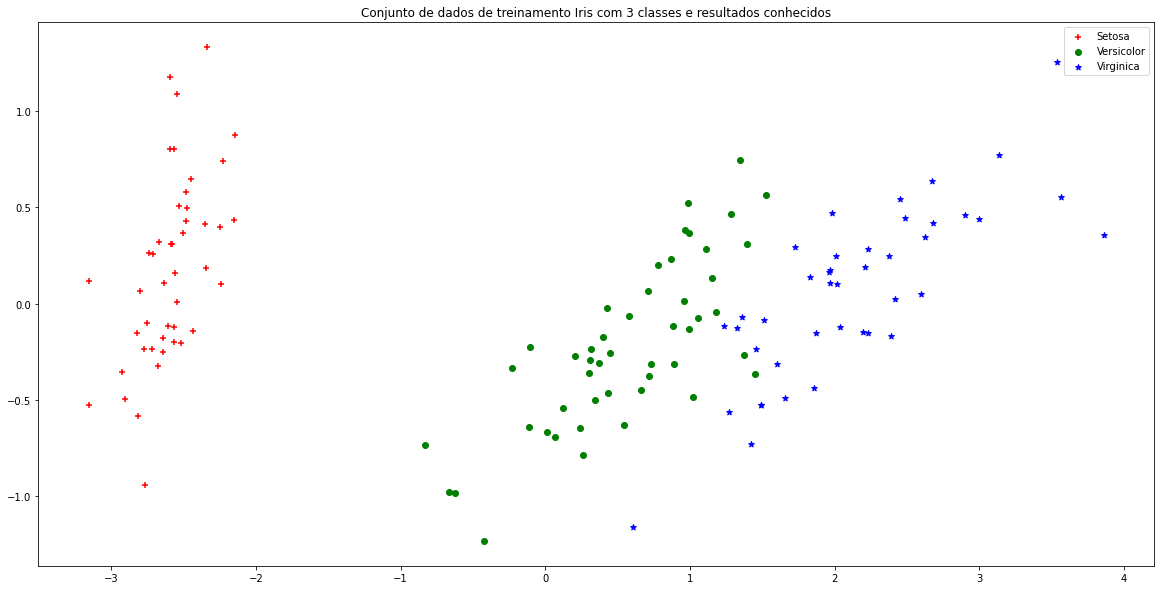

In [73]:
# PLOTANDO O CLASSIFICADOR
pl.figure(figsize= (20, 10))        

for i in range(0, pca_2d.shape[0]):
    if Y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],
                        pca_2d[i,1],
                        c='r',
                        marker='+')
    elif Y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],
                        pca_2d[i,1],
                        c='g',
                        marker='o')
    elif Y_train[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],
                        pca_2d[i,1],
                        c='b',
                        marker='*')

pl.legend([c1, c2, c3], ['Setosa', 'Versicolor', 'Virginica'])
pl.title("Conjunto de dados de treinamento Iris com 3 classes e resultados conhecidos")

pl.show()